In [ ]:
# Import all needed libraries and sublibraries
import numpy as np
import pandas as pd

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Import dataset and storing it as a pandas dataframe

df=pd.read_csv('IOT_Assignment_2_data_regression_sensor_range.csv')

In [ ]:
df

,Humidity(%),Temperature(°C),WaterFlow(%)
0,25.045045,76.856857,67.432607
1,8.880881,31.771772,0.000000
2,24.956957,75.735736,66.105904
3,40.328328,88.308308,0.000000
4,38.742743,57.157157,0.000000
...,...,...,...
195,14.474474,30.890891,0.000000
196,35.395395,51.551552,0.000000
197,23.855856,100.000000,96.088487
198,41.649650,76.856857,0.000000


In [ ]:
#Data exploration:
df.describe()

,Humidity(%),Temperature(°C),WaterFlow(%)
count,200.000000,200.000000,200.000000
mean,31.137437,59.747347,25.496364
std,12.386344,23.112767,34.953661
min,8.132132,20.000000,0.000000
25%,21.015015,40.860861,0.000000
50%,30.616617,58.638639,0.000000
75%,41.528529,78.998999,61.884829
max,51.867868,100.000000,100.000000


In [ ]:
#Renaming column names:
df=df.rename(columns={'Humidity(%)':'Humidity','Temperature(°C)':'Temperature','WaterFlow(%)':'Waterflow'})

In [ ]:
df

,Humidity,Temperature,Waterflow
0,25.045045,76.856857,67.432607
1,8.880881,31.771772,0.000000
2,24.956957,75.735736,66.105904
3,40.328328,88.308308,0.000000
4,38.742743,57.157157,0.000000
...,...,...,...
195,14.474474,30.890891,0.000000
196,35.395395,51.551552,0.000000
197,23.855856,100.000000,96.088487
198,41.649650,76.856857,0.000000


Rearranging order of input data:

In [ ]:
df_sample=df.sample(frac=1)

In [ ]:
df_sample=df_sample.reset_index(drop=True)

In [ ]:
df_sample

,Humidity,Temperature,Waterflow
0,23.855856,100.000000,96.088487
1,21.873874,71.651652,62.906293
2,24.384384,83.183183,75.564338
3,30.638639,70.770771,0.000000
4,17.117117,84.384384,81.384543
...,...,...,...
195,27.511512,95.995996,89.126063
196,20.332332,32.972973,0.000000
197,45.041041,38.178178,0.000000
198,15.707708,52.912913,42.856476


In [ ]:
#Splitting dataset into X(Humidity(%), Temperature(°C)) and y(WaterFlow(%)) values:
X=df_sample[['Humidity','Temperature']]
y=df_sample[['Waterflow']]

In [ ]:
X

,Humidity,Temperature
0,23.855856,100.000000
1,21.873874,71.651652
2,24.384384,83.183183
3,30.638639,70.770771
4,17.117117,84.384384
...,...,...
195,27.511512,95.995996
196,20.332332,32.972973
197,45.041041,38.178178
198,15.707708,52.912913


In [ ]:
y

,Waterflow
0,96.088487
1,62.906293
2,75.564338
3,0.000000
4,81.384543
...,...
195,89.126063
196,0.000000
197,0.000000
198,42.856476


In [ ]:
X_train=X
y_train=y

In [ ]:
y_train

,Waterflow
0,96.088487
1,62.906293
2,75.564338
3,0.000000
4,81.384543
...,...
195,89.126063
196,0.000000
197,0.000000
198,42.856476


In [ ]:
X_train

,Humidity,Temperature
0,23.855856,100.000000
1,21.873874,71.651652
2,24.384384,83.183183
3,30.638639,70.770771
4,17.117117,84.384384
...,...,...
195,27.511512,95.995996
196,20.332332,32.972973
197,45.041041,38.178178
198,15.707708,52.912913


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


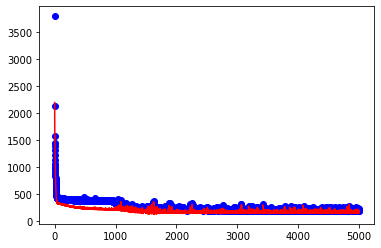

In [ ]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(3, input_shape=(2,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.01), 'mean_squared_error')

# Runs model for 5000 iterations and assigns this to 'history'
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 5000, verbose = 0) #By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch. verbose=0 will show you nothing (silent).

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [ ]:
# Runs model with its current weights on the training data
y_train_pred = model.predict(X_train)

# Calculates and prints r2 score of training data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))

The R2 score on the Train set is:	0.840


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred, squared=False) #Div by 100 bec we convert percentage to ratio(value between 0 an 1)

13.948431959449756

In [ ]:
df.sample(10)

,Humidity,Temperature,Waterflow
195,14.474474,30.890891,0.000000
28,19.539540,79.259259,73.683097
47,14.870871,50.910911,40.751165
167,36.804805,45.545546,0.000000
128,50.062062,39.459459,0.000000
166,30.946947,85.745746,0.000000
58,23.503504,22.402402,0.000000
13,42.310310,45.785786,0.000000
66,51.207207,94.074074,72.610376
165,18.570571,69.409409,62.099206


In [ ]:
model.predict([[14,30]])

array([[6.5650177]], dtype=float32)

In [ ]:
model.weights

[<tf.Variable 'dense_27/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 1.1563146 ,  0.26206368,  1.9639573 ],
        [-0.25177678,  0.47050536, -0.7135683 ]], dtype=float32)>,
 <tf.Variable 'dense_27/bias:0' shape=(3,) dtype=float32, numpy=array([-14.905402 ,  -4.5643663,   5.9763675], dtype=float32)>,
 <tf.Variable 'dense_28/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 3.8171318 , -0.4962946 , -4.482957  ],
        [ 0.5365088 ,  0.1100239 ,  0.29739815],
        [-2.029649  ,  0.4271137 , -0.27374294]], dtype=float32)>,
 <tf.Variable 'dense_28/bias:0' shape=(3,) dtype=float32, numpy=array([-4.8820076, -1.640905 ,  5.976514 ], dtype=float32)>,
 <tf.Variable 'dense_29/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[3.6645076 ],
        [0.13679582],
        [1.0162396 ]], dtype=float32)>,
 <tf.Variable 'dense_29/bias:0' shape=(1,) dtype=float32, numpy=array([-0.8270513], dtype=float32)>]

UPDATE THE WEIGHTS HERE:

In [ ]:
a=max(0,-3)

In [ ]:
a

0

In [ ]:
#h->humidity value; t->temperature value
def ml_func(h,t):
  a3=max(0,(((1.1563146)*h)+((-0.25177678)*t)+(-14.905402 ))) #We're doing max here bec. we use ReLu func. at each layer: o/p=max(0,x)
  a4=max(0,(((0.26206368)*h)+((0.47050536)*t)+(-4.5643663)))
  a5=max(0,(((1.9639573)*h)+((-0.7135683)*t)+(5.9763675)))

  a6=max(0,(((3.8171318)*a3)+((0.5365088)*a4)+((-2.029649)*a5)+(-4.8820076)))
  a7=max(0,(((-0.4962946)*a3)+((0.1100239)*a4)+((0.4271137)*a5)+(-1.640905)))
  a8=max(0,(((-4.482957)*a3)+((0.29739815)*a4)+((-0.27374294)*a5)+(5.976514)))

  a9=max(0,(((3.6645076)*a6)+((0.13679582)*a7)+((1.0162396)*a8)+(-0.8270513)))
  r=a9
  if r<0:
    r=0
  return r #Output percentage of waterflow

In [ ]:
ml_func(14,50)

38.80293648244582

**We have succesfully generated our ML model. The optimal parameters obtained are as follows:**

Learning Rate=**0.01**

Epochs=**5000**

